In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
mnist= input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
x_train = mnist.train.images
x_test = mnist.test.images
y_train = mnist.train.labels
y_test = mnist.test.labels

In [5]:
x_train.shape

(55000, 784)

In [6]:
y_train.shape

(55000, 10)

In [7]:
x = tf.placeholder( tf.float32, [None,784])
y = tf.constant( y_train, tf.float32)

In [8]:
w1 = tf.Variable( tf.random_uniform([784,100 ]) )
b1 = tf.Variable( tf.random_uniform([100]) )
w2 = tf.Variable( tf.random_uniform([100,10 ]) )
b2 = tf.Variable( tf.random_uniform([10]) )

In [9]:
w1 = tf.get_variable( 'w1',[784,100] ,
        initializer=tf.contrib.layers.xavier_initializer() )
b1 = tf.get_variable( 'b1',[100] ,
        initializer=tf.contrib.layers.xavier_initializer() )
w2 = tf.get_variable( 'w2',[100,10] ,
        initializer=tf.contrib.layers.xavier_initializer() )
b2 = tf.get_variable( 'b2',[10] ,
        initializer=tf.contrib.layers.xavier_initializer() )

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [10]:
z1 = tf.matmul( x, w1) + b1
lay1 = tf.nn.relu( z1 )
z2 = tf.matmul( lay1, w2 ) + b2
hx = tf.nn.softmax( z2 )

In [11]:
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=z2,
                                            labels=y)
cost = tf.reduce_mean(cost_i)

In [12]:
optimizer = tf.train.GradientDescentOptimizer(0.1)#learning rate
train = optimizer.minimize( cost )
sess = tf.Session()
init =tf.global_variables_initializer()
sess.run( init)

In [13]:
for i in range(300):
    sess.run( train, {x:x_train})
    print( i, sess.run( cost, {x:x_train}))

0 2.3079243
1 2.2113597
2 2.1288753
3 2.053267
4 1.9814297
5 1.9120545
6 1.8445283
7 1.7787561
8 1.7147787
9 1.652719
10 1.5927532
11 1.5350102
12 1.4795805
13 1.426616
14 1.3761753
15 1.328305
16 1.2830454
17 1.2404041
18 1.2002785
19 1.1625981
20 1.127273
21 1.0941776
22 1.0631804
23 1.0341464
24 1.0069495
25 0.98146534
26 0.95756114
27 0.9351258
28 0.91405916
29 0.8942571
30 0.8756263
31 0.85807204
32 0.8415152
33 0.8258764
34 0.8110919
35 0.7970957
36 0.78383166
37 0.77124226
38 0.7592825
39 0.7479067
40 0.7370757
41 0.72675097
42 0.7168999
43 0.70748806
44 0.69848585
45 0.689867
46 0.6816086
47 0.67368835
48 0.6660861
49 0.65878236
50 0.6517599
51 0.6450021
52 0.6384932
53 0.63221943
54 0.6261685
55 0.62032866
56 0.61468875
57 0.6092371
58 0.6039649
59 0.5988623
60 0.59392107
61 0.5891336
62 0.5844929
63 0.5799913
64 0.57562286
65 0.57138157
66 0.5672624
67 0.5632599
68 0.559368
69 0.55558175
70 0.55189645
71 0.5483087
72 0.5448139
73 0.5414086
74 0.5380901
75 0.5348547
76 0.53169

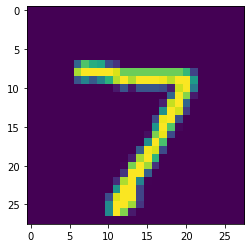

In [14]:
plt.imshow( x_test[0].reshape(28,28))
plt.show()

In [29]:
sess.run( hx, {x:x_test[[0]]}).argmax( axis=1)

array([7], dtype=int64)

### 정확도

In [30]:
aa = sess.run(hx,{x:x_test})
h = aa.argmax(axis=1)

In [31]:
bb = y_test.argmax(axis=1)

In [32]:
(h==bb).mean()

0.9119